# Tutorial 3 - MIBR

## Exoplanet exploration using Machine Learning (derived from Nagesh Singh Chauhan)

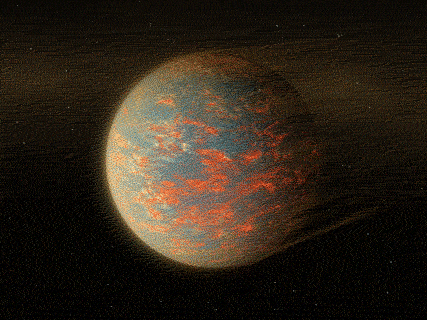

> ## What are exoplanets?
>
>Exoplanets are planets beyond our own solar system. Thousands have been discovered in the past two decades, mostly with NASA’s Kepler Space Telescope.
>
>These exoplanets come in a huge variety of sizes and orbits. Some are gigantic planets hugging close to their parent stars; others are icy, some rocky. NASA and other agencies are looking for a special kind of planet: one that’s the same size as Earth, orbiting a sun-like star in the habitable zone.
>
>
>The habitable zone is the area around a star where it is not too hot and not too cold for liquid water to exist on the surface of surrounding planets. Imagine if Earth was where Pluto is. The Sun would be barely visible (about the size of a pea) and Earth’s ocean and much of its atmosphere would freeze.

> You can also check out my article to understand more about exoplanets at [www.theaidream.com](https://www.theaidream.com/post/exoplanet-exploration-using-machine-learning)

We install imblearn on our local machine first

In [ ]:
pip install imblearn

### Load all the required libraries

In [1]:
# Standard packages
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# For Data Preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage

# model builders
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Load the train and test data.

In [2]:
test_data = pd.read_csv('exoTest.csv')
train_data = pd.read_csv('exoTrain.csv')

In [3]:
train_data.head()

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08     -39.54  
1      -4.86       0.76     -11.70       6.46      16.00      19.93  
2     -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3      20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4    -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  

[5 rows x 3198 columns]

# Exploratory Data Analysis

Judging from the way the dataframe is made, the rows contain specific exoplanet fluxes while the columns contain the label (Col 1) and flux of the parent star (the rest of the columns)

Now the target column LABEL consists of two categories 1(Does not represents exoplanet) and 2(represents the presence of exoplanet). So, convert them to binary values for easier processing of data.

In [4]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

In [5]:
train_data.describe()

LABEL        FLUX.1        FLUX.2        FLUX.3        FLUX.4  \
count  5087.000000  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean      0.007273  1.445054e+02  1.285778e+02  1.471348e+02  1.561512e+02   
std       0.084982  2.150669e+04  2.179717e+04  2.191309e+04  2.223366e+04   
min       0.000000 -2.278563e+05 -3.154408e+05 -2.840018e+05 -2.340069e+05   
25%       0.000000 -4.234000e+01 -3.952000e+01 -3.850500e+01 -3.505000e+01   
50%       0.000000 -7.100000e-01 -8.900000e-01 -7.400000e-01 -4.000000e-01   
75%       0.000000  4.825500e+01  4.428500e+01  4.232500e+01  3.976500e+01   
max       1.000000  1.439240e+06  1.453319e+06  1.468429e+06  1.495750e+06   

             FLUX.5        FLUX.6        FLUX.7        FLUX.8        FLUX.9  \
count  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   1.561477e+02  1.469646e+02  1.168380e+02  1.144983e+02  1.228639e+02   
std    2.308448e+04  2.410567e+04  2.414109e+04  2.290691e+04  2.102681e+04   
min   -4.231956e+05 -5.975521e+05 -6.724046e+05 -5.790136e+05 -3.973882e+05   
25%   -3.195500e+01 -3.338000e+01 -2.813000e+01 -2.784000e+01 -2.683500e+01   
50%   -6.100000e-01 -1.030000e+00 -8.700000e-01 -6.600000e-01 -5.600000e-01   
75%    3.975000e+01  3.514000e+01  3.406000e+01  3.170000e+01  3.045500e+01   
max    1.510937e+06  1.508152e+06  1.465743e+06  1.416827e+06  1.342888e+06   

       ...     FLUX.3188     FLUX.3189     FLUX.3190     FLUX.3191  \
count  ...  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   ...  3.485578e+02  4.956476e+02  6.711211e+02  7.468790e+02   
std    ...  2.864786e+04  3.551876e+04  4.349963e+04  4.981375e+04   
min    ... -3.240480e+05 -3.045540e+05 -2.933140e+05 -2.838420e+05   
25%    ... -1.760000e+01 -1.948500e+01 -1.757000e+01 -2.076000e+01   
50%    ...  2.600000e+00  2.680000e+00  3.050000e+00  3.590000e+00   
75%    ...  2.211000e+01  2.235000e+01  2.639500e+01  2.909000e+01   
max    ...  1.779338e+06  2.379227e+06  2.992070e+06  3.434973e+06   

          FLUX.3192     FLUX.3193      FLUX.3194      FLUX.3195  \
count  5.087000e+03  5.087000e+03    5087.000000    5087.000000   
mean   6.937372e+02  6.553031e+02    -494.784966    -544.594264   
std    5.087103e+04  5.339979e+04   17844.469520   17722.339334   
min   -3.288214e+05 -5.028894e+05 -775322.000000 -732006.000000   
25%   -2.226000e+01 -2.440500e+01     -26.760000     -24.065000   
50%    3.230000e+00  3.500000e+00      -0.680000       0.360000   
75%    2.780000e+01  3.085500e+01      18.175000      18.770000   
max    3.481220e+06  3.616292e+06  288607.500000  215972.000000   

           FLUX.3196      FLUX.3197  
count    5087.000000    5087.000000  
mean     -440.239100    -300.536399  
std     16273.406292   14459.795577  
min   -700992.000000 -643170.000000  
25%       -21.135000     -19.820000  
50%         0.900000       1.430000  
75%        19.465000      20.280000  
max    207590.000000  211302.000000  

[8 rows x 3198 columns]

Now visualize the target column in the train_dataset and get an idea about the class distribution.

In [6]:
train_data['LABEL'].value_counts() # counts each of the values for a specific Series

0    5050
1      37
Name: LABEL, dtype: int64

In [7]:
train_data[train_data['LABEL']==1]

LABEL     FLUX.1     FLUX.2     FLUX.3    FLUX.4    FLUX.5    FLUX.6  \
0       1      93.85      83.81      20.10    -26.98    -39.56   -124.71   
1       1     -38.88     -33.83     -58.54    -40.09    -79.31    -72.81   
2       1     532.64     535.92     513.73    496.92    456.45    466.00   
3       1     326.52     347.39     302.35    298.13    317.74    312.70   
4       1   -1107.21   -1112.59   -1118.95  -1095.10  -1057.55  -1034.48   
5       1     211.10     163.57     179.16    187.82    188.46    168.13   
6       1       9.34      49.96      33.30      9.63     37.64     20.85   
7       1     238.77     262.16     277.80    190.16    180.98    123.27   
8       1    -103.54    -118.97    -108.93    -72.25    -61.46    -50.16   
9       1    -265.91    -318.59    -335.66   -450.47   -453.09   -561.47   
10      1     118.81     110.97      79.53    114.25     48.78      3.12   
11      1    -239.88    -164.28    -180.91   -225.69    -90.66   -130.66   
12      1      70.34      63.86      58.37     69.43     64.18     52.70   
13      1     424.14     407.71     461.59    428.17    412.69    395.58   
14      1    -267.21    -239.11    -233.15   -211.84   -191.56   -181.69   
15      1      35.92      45.84      47.99     74.58     87.97     87.97   
16      1    -122.30    -122.30    -131.08   -109.69   -109.69    -95.27   
17      1     -65.20     -76.33     -76.23    -72.58    -69.62    -74.51   
18      1     -66.47     -15.50     -44.59    -49.03    -70.16    -85.53   
19      1     560.19     262.94     189.94    185.12    210.38    104.19   
20      1   -1831.31   -1781.44   -1930.84  -2016.72  -1963.31  -1956.12   
21      1    2053.62    2126.05    2146.33   2159.84   2237.59   2236.12   
22      1     -48.48     -22.95      11.15    -70.04   -120.34   -150.04   
23      1     145.84     137.82      96.99     17.09    -73.79   -157.79   
24      1     207.37     195.04     150.45    135.34    104.90     59.79   
25      1     304.50     275.94     269.24    248.51    194.88    167.80   
26      1  150725.80  129578.36  102184.98  82253.98  67934.17  48063.52   
27      1     124.39      72.73      36.85     -4.68      6.96    -44.61   
28      1     -63.50     -49.15     -45.99    -34.55    -44.34    -15.80   
29      1      31.29      25.14      36.93     16.63     17.01     -7.50   
30      1    -472.50    -384.09    -330.42   -273.41   -185.02   -115.64   
31      1     194.82     162.51     126.17    129.70     82.27     60.71   
32      1      26.96      38.98      25.99     47.28     26.29     34.08   
33      1      43.07      46.73      29.43      9.75      6.54     -3.76   
34      1    -248.23    -243.59    -217.91   -190.69   -190.17   -163.04   
35      1      22.82      46.37      39.61     98.75     81.32    100.43   
36      1      26.24      42.32      28.34     24.81     49.39     47.57   

      FLUX.7    FLUX.8   FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  \
0    -135.18    -96.27   -79.89  ...     -78.07    -102.15    -102.15   
1     -86.55    -85.33   -83.97  ...      -3.28     -32.21     -32.21   
2     464.50    486.39   436.56  ...     -71.69      13.31      13.31   
3     322.33    311.31   312.42  ...       5.71      -3.73      -3.73   
4    -998.34  -1022.71  -989.57  ...    -594.37    -401.66    -401.66   
5     203.46    178.65   166.49  ...     -98.45      30.34      30.34   
6       4.54     22.42    10.11  ...     -58.56       9.93       9.93   
7     103.95     50.70    59.91  ...     -72.48      31.77      31.77   
8     -20.61    -12.44     1.48  ...      43.92       7.24       7.24   
9    -606.03   -712.72  -685.97  ...    3671.03    2249.28    2249.28   
10     -4.09     66.20   -26.02  ...      50.05      50.05      50.05   
11   -149.75   -120.50  -157.00  ...    -364.75    -364.75    -364.75   
12     47.58     46.89    46.00  ...       6.45      -8.91      -8.91   
13    453.35    410.45   402.09  ...     238.36      46.65      46.65   
14   -164.77   -156.

We have 5050 records of non-exoplanets and 37 records of exoplanets. Fortunately, the DataFrame is arranged such that the 37 exoplanets are the first 37 rows while the rest are non-exoplanet fluxes.

Text(0.5, 1.0, 'Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)')

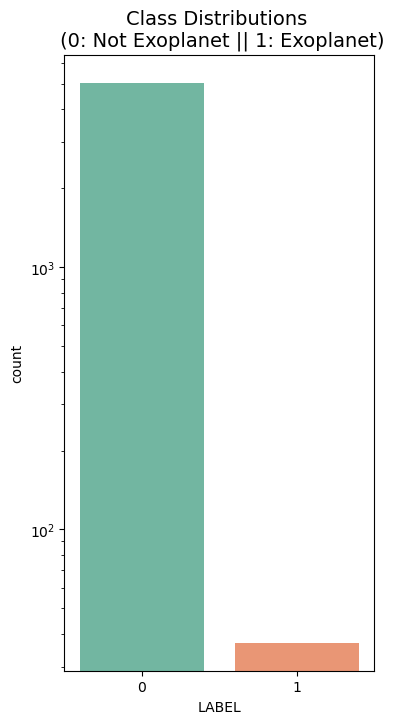

In [8]:
plt.figure(figsize=(4,8))
colors = ["0", "1"]
sns.countplot('LABEL', data=train_data, palette = "Set2")
plt.yscale('log')
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=14)

It turns out that the data is highly imbalanced so later on we'll be using some sampling techniques to balance the data.

**Flux :** the intensity of light received from a planet

### Let us plot the 2 instances of exoplanets and 2 instances of non-exoplanet fluxes from the training dataset and observe the intensity of flux values.

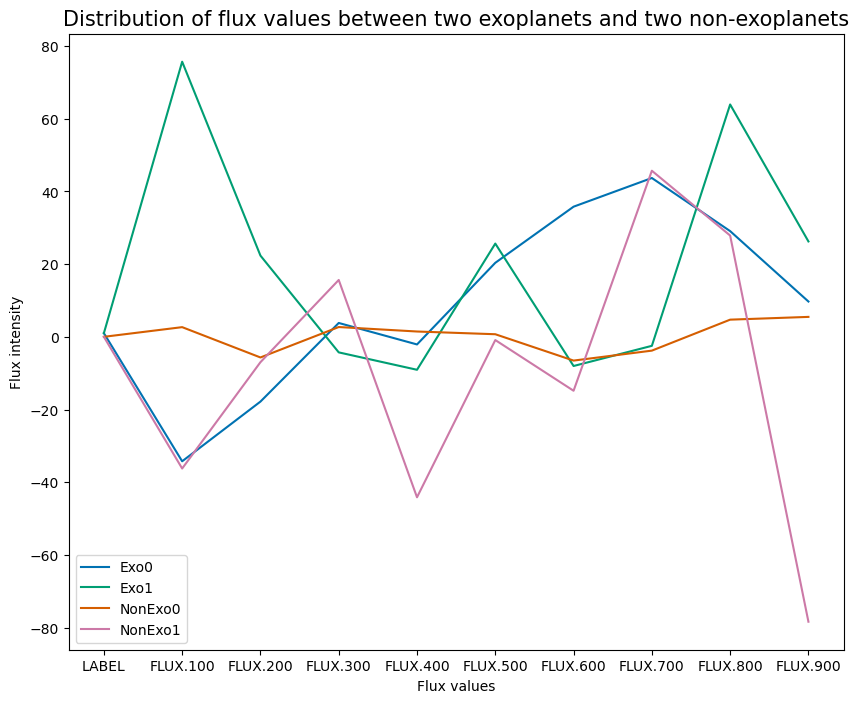

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of flux values between two exoplanets and two non-exoplanets', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train_data.iloc[16,:1000:100], label='Exo0')
plt.plot(train_data.iloc[25,:1000:100], label='Exo1')
plt.plot(train_data.iloc[50,:1000:100], label='NonExo0')
plt.plot(train_data.iloc[100,:1000:100], label='NonExo1')
plt.legend()
plt.show()

### Plotting the correlation matrix

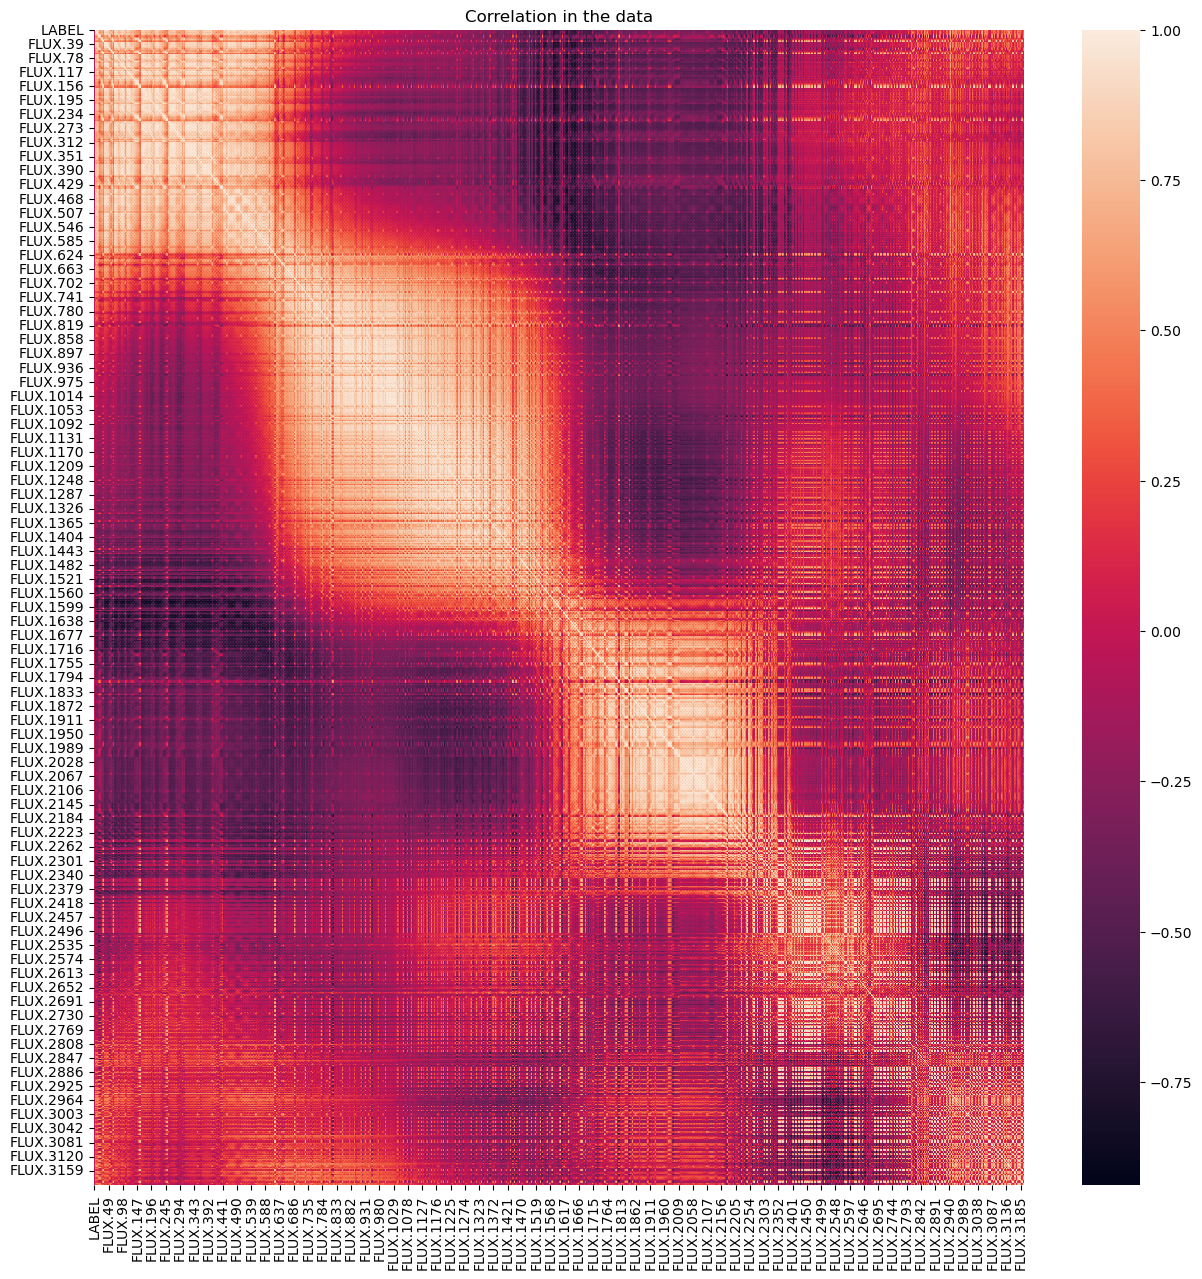

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr())
plt.title('Correlation in the data')
plt.show()

### Plot the Gaussian histogram of non-exoplanets data.

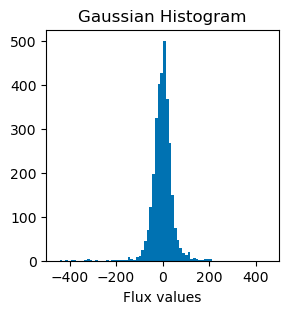

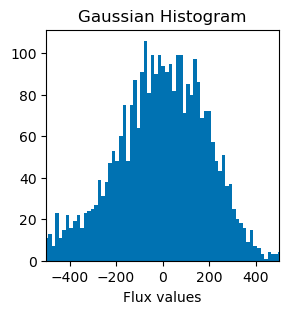

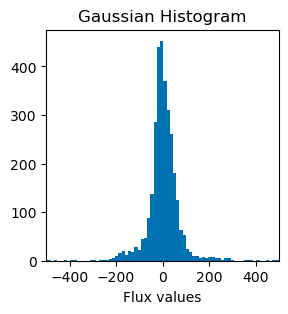

In [11]:
labels_1=[100,200,300]
for i in labels_1:
    plt.figure(figsize=(3,3))
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.xlim(-500,500)
    plt.show()

### Plot Gaussian histogram of the data when exoplanets are present.

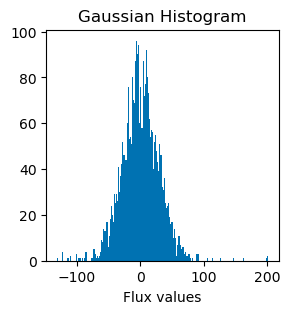

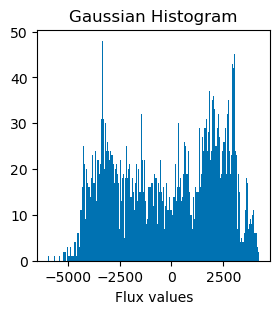

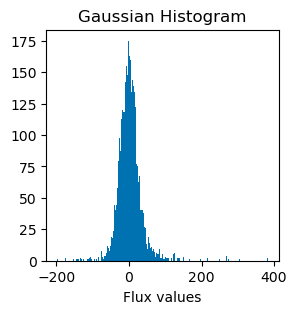

In [12]:
labels_1=[16,21,25]
for i in labels_1:
    plt.figure(figsize=(3,3))
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

### Detecting outliers using Boxplot

> Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. 

<AxesSubplot:xlabel='LABEL', ylabel='FLUX.100'>

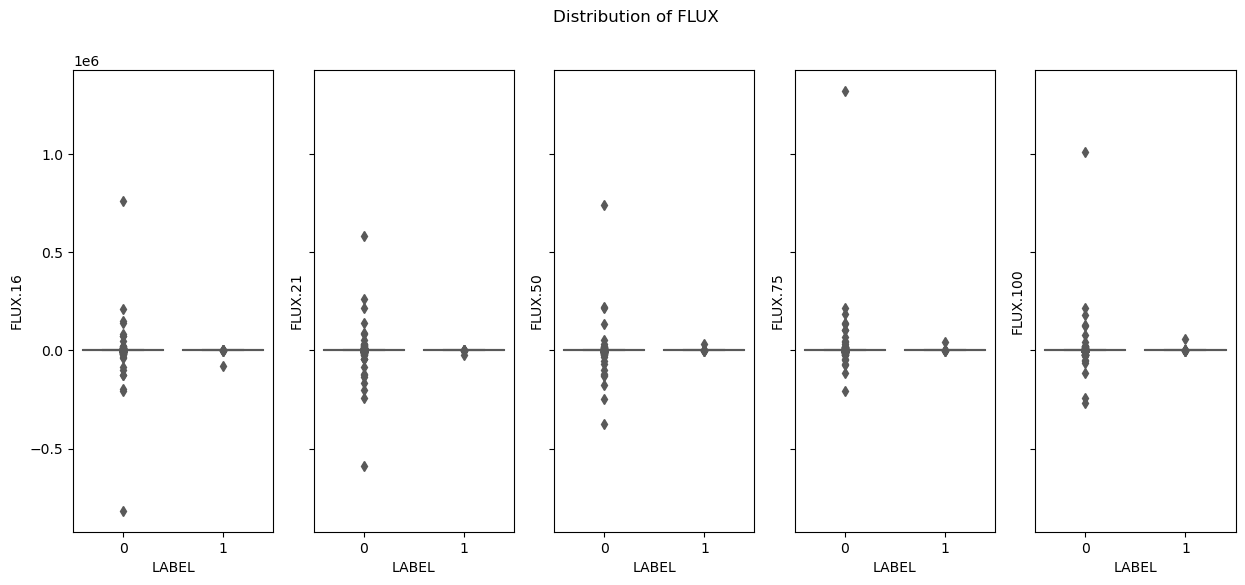

In [13]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=train_data, x='LABEL', y='FLUX.16',palette="Set2")
sns.boxplot(ax=axes[1], data=train_data, x='LABEL', y='FLUX.21',palette="Set2")
sns.boxplot(ax=axes[2], data=train_data, x='LABEL', y='FLUX.50',palette="Set2")
sns.boxplot(ax=axes[3], data=train_data, x='LABEL', y='FLUX.75',palette="Set2")
sns.boxplot(ax=axes[4], data=train_data, x='LABEL', y='FLUX.100',palette="Set2")


In [14]:
print('Dropping Outliers')
train_data.drop(train_data[train_data['FLUX.1']>250000].index, axis=0, inplace=True)

Dropping Outliers


# Data preprocessing

### Split the dataset

So let us first split our dataset and normalize it.

In [15]:
# Combine the two datasets and split them accordingly
dataset = pd.concat([train_data, test_data])
data = dataset.reset_index(drop=True)
x = data.drop(["LABEL"], axis=1)
y = data["LABEL"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

# x_train = train_data.drop(["LABEL"],axis=1)
# y_train = train_data["LABEL"]   
# x_test = test_data.drop(["LABEL"],axis=1)
# y_test = test_data["LABEL"]

In [18]:
x_train.head()

FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  FLUX.9  \
1916    5.20   -4.13   -4.98  -12.02   -1.19    7.06   -5.74    7.99   -5.03   
37   -141.22  -81.79  -52.28  -32.45   -1.55  -35.61  -23.28   19.45   53.11   
1589   96.76   96.06  113.73   94.26   94.29  117.30  118.33  146.90  109.48   
104  -489.56 -548.25 -513.43 -477.69 -382.56 -439.62 -356.56 -326.37 -286.06   
1047 -127.22   79.22  -37.03 -138.43  -86.50   -2.59  118.07   57.47   94.66   

      FLUX.10  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  FLUX.3192  \
1916    -4.95  ...       2.32      16.44      12.21      20.17      22.21   
37      29.75  ...     -50.79     -22.34     -36.23      27.44      13.52   
1589   134.11  ...     -89.67     -82.27     -57.48     -57.74    -114.69   
104   -186.62  ...    -425.50    -495.56    -357.69    -298.19    -189.31   
1047   -12.78  ...       2.38    -165.65     -66.40    -136.65    -175.19   

      FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
1916      27.53      12.98       9.99      -0.59       2.79  
37        38.66     -17.53      31.49      31.38      50.03  
1589     -81.13      -8.73     -16.81     -15.81      11.42  
104      -30.75    -495.43    -641.62    -631.87    -497.93  
1047    -282.69      24.69      89.00      73.16      80.69  

[5 rows x 3197 columns]

### Data Normalization

**Data Normalization** is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [19]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

### Apply gaussian filters

The next step is to apply gaussian filters to both test and train.


In probability theory, the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

In [20]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

### Feature scaling

we use feature scaling so that all the values remain in the comparable range.

In [21]:
#Feature scaling
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

# Model Building (not oversampled)

In [26]:
print(x_train.shape)

(3789, 3197)


Validation accuracy of KNN is 0.9925013390465989

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1853
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1867
   macro avg       0.50      0.50      0.50      1867
weighted avg       0.99      0.99      0.99      1867



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

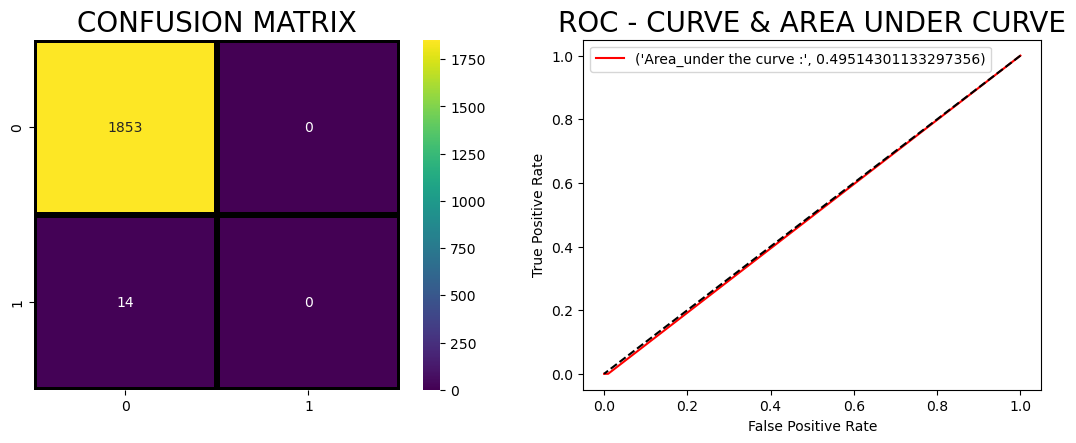

In [27]:
#K-NN
knn_model = KNeighborsClassifier()

knn_model.fit(x_train,y_train)
prediction=knn_model.predict(x_test)
print('Validation accuracy of KNN is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Logistic Regression is 0.9780396357793251

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1853
           1       0.03      0.07      0.05        14

    accuracy                           0.98      1867
   macro avg       0.51      0.53      0.52      1867
weighted avg       0.99      0.98      0.98      1867



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

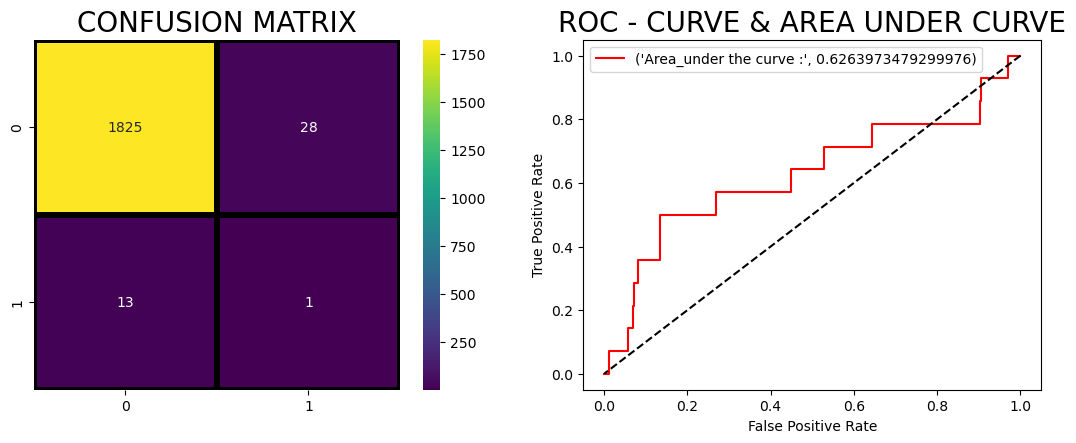

In [28]:
#Logistic Regression
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(x_train,y_train)

prediction=lr_model.predict(x_test)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Decision Tree is 0.9866095340117836

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1853
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1867
   macro avg       0.50      0.50      0.50      1867
weighted avg       0.99      0.99      0.99      1867



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

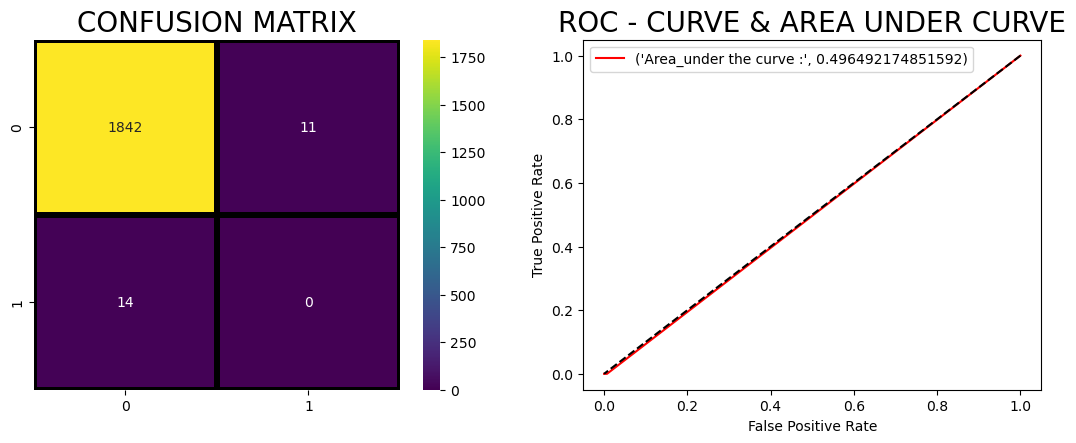

In [29]:
#Decision Tree
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(x_train,y_train)

prediction=ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Since the dataset is highly imbalanced even if the model predicts the same class for all data points the accuracy.

So let us first balance the classes and model it again.

### Balancing the class using SMOTE

**SMOTE** **(synthetic minority oversampling technique)** is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. **SMOTE** synthesises new minority instances between existing minority instances.

> SMOTE allows to generate samples. However, this method of over-sampling does not have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated, e.g. when the different classes cannot be well separated. Hence, it can be beneficial to apply an under-sampling algorithm to clean the noisy samples. Two methods are usually used in the literature: (i) Tomek’s link and (ii) edited nearest neighbours cleaning methods. Imbalanced-learn provides two ready-to-use samplers SMOTETomek and SMOTEENN. In general, SMOTEENN cleans more noisy data than SMOTETomek.

-- From the [imblearn docs](https://imbalanced-learn.org/stable/auto_examples/combine/plot_comparison_combine.html)

<AxesSubplot:xlabel='index'>

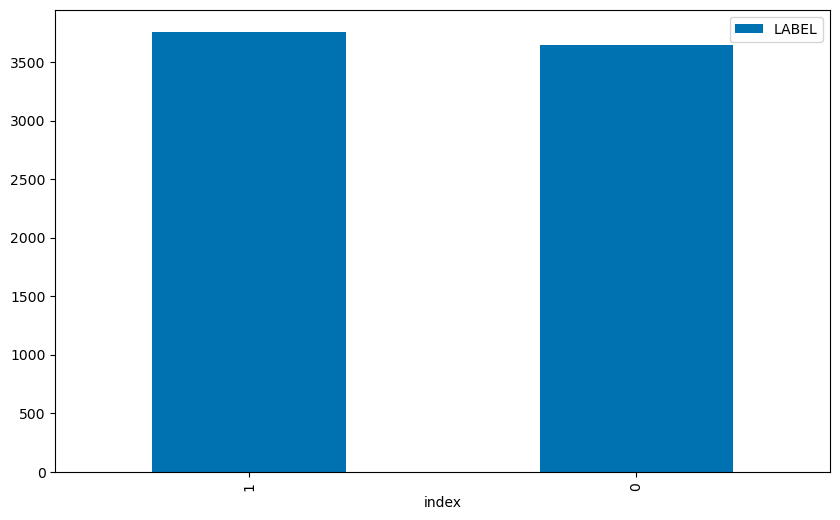

In [31]:
from imblearn.combine import SMOTEENN
model = SMOTEENN()
ov_train_x, ov_train_y = model.fit_resample(x_train, y_train)
# ov_test_x, ov_test_y = model.fit(x_test, y_test) 
ov_train_y = ov_train_y.astype('int')

ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')


### Application of oversampled data to models

Validation accuracy of Decision Tree is 0.741831815747188

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      1853
           1       0.01      0.36      0.02        14

    accuracy                           0.74      1867
   macro avg       0.50      0.55      0.44      1867
weighted avg       0.99      0.74      0.85      1867



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

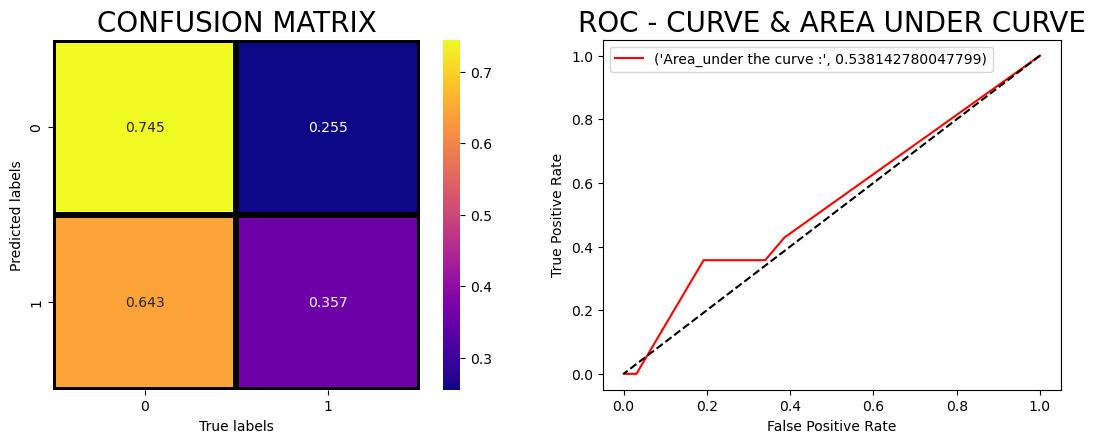

In [32]:
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(ov_train_x,ov_train_y)

prediction=ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction,normalize='true'),annot=True,cmap="plasma",fmt = ".3f",linecolor="k",lw=3)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of KNN is 0.6293519014461704

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.63      0.77      1853
           1       0.01      0.71      0.03        14

    accuracy                           0.63      1867
   macro avg       0.51      0.67      0.40      1867
weighted avg       0.99      0.63      0.77      1867



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

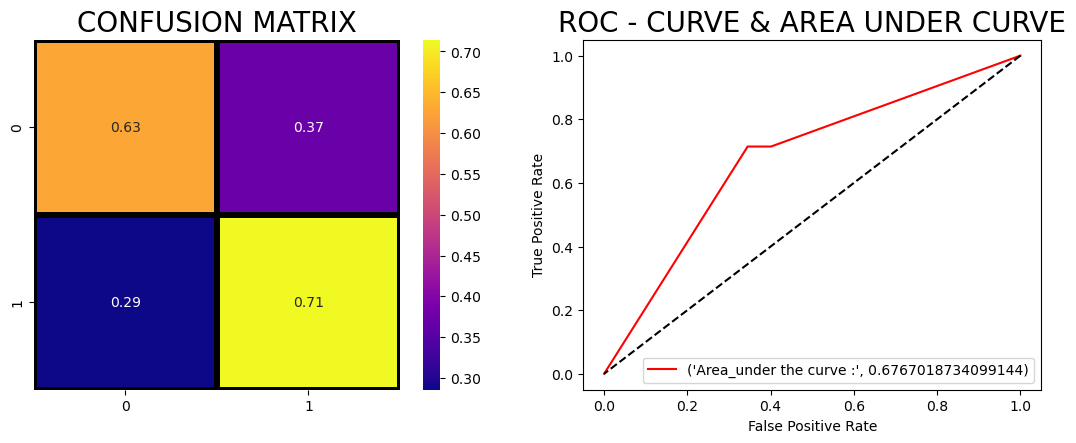

In [33]:
knn_model = KNeighborsClassifier()

knn_model.fit(ov_train_x,ov_train_y)

prediction=knn_model.predict(x_test)

print('Validation accuracy of KNN is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction,normalize='true'),annot=True,cmap="plasma",fmt = ".2f",linecolor="k",lw=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Logistic Regression is 0.9464381360471344

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1853
           1       0.01      0.07      0.02        14

    accuracy                           0.95      1867
   macro avg       0.50      0.51      0.50      1867
weighted avg       0.99      0.95      0.97      1867



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

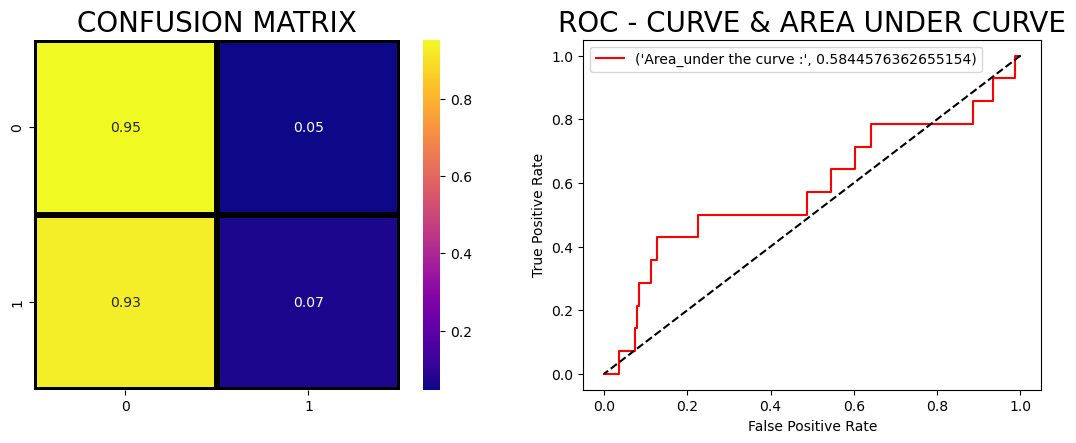

In [34]:
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(ov_train_x,ov_train_y)

prediction=lr_model.predict(x_test)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction, normalize='true'),annot=True,cmap="plasma",fmt = ".2f",linecolor="k",lw=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)